## 📊 Project Overview

**Objective:**  
Analyze sales, customers, and products to identify revenue growth opportunities and improve inventory management.

**Dataset:**  
Superstore — a retail dataset containing detailed information about sales, customers, products, regions, and profit margins.

**Business Questions:**  
- Which products and categories generate the most revenue?  
- Who are the most valuable customers?  
- Where should marketing strategies focus regionally?  
- What sales trends can help with stock and promotion planning?


In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/raw/superstore.csv')

df.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


I check the shape of the dataset, data types, and whether there are any missing values.

In [133]:
# Check column names, types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales           51290 non-null 

In [134]:
df.isnull().sum()

Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
记录数               0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64

In [135]:
df.duplicated().sum()

np.int64(0)

In [136]:
# Convert date columns to datetime format
df['Order.Date'] = pd.to_datetime(df['Order.Date'])
df['Ship.Date'] = pd.to_datetime(df['Ship.Date'])

In [137]:
# Create Delivery Time in days column
df['Delivery.Time'] = (df['Ship.Date'] - df['Order.Date']).dt.days 

In [138]:
# Create Profit Margin column
df['Profit.Margin'] = df['Profit'] / df['Sales']

In [139]:
df.columns

Index(['Category', 'City', 'Country', 'Customer.ID', 'Customer.Name',
       'Discount', 'Market', '记录数', 'Order.Date', 'Order.ID', 'Order.Priority',
       'Product.ID', 'Product.Name', 'Profit', 'Quantity', 'Region', 'Row.ID',
       'Sales', 'Segment', 'Ship.Date', 'Ship.Mode', 'Shipping.Cost', 'State',
       'Sub.Category', 'Year', 'Market2', 'weeknum', 'Delivery.Time',
       'Profit.Margin'],
      dtype='object')

Descriptive Analysis

In [140]:
df.describe()

C:\Users\everi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Discount,记录数,Order.Date,Profit,Quantity,Row.ID,Sales,Ship.Date,Shipping.Cost,Year,weeknum,Delivery.Time,Profit.Margin
count,51290.000000,51290.0,51290,51290.000000,51290.000000,51290.00000,51290.000000,51290,51290.000000,51290.000000,51290.000000,51290.000000,5.129000e+04
mean,0.142908,1.0,2013-05-11 21:26:49.155780864,28.610982,3.476545,25645.50000,246.498440,2013-05-15 20:42:42.745174784,26.375818,2012.777208,31.287112,3.969370,-inf
min,0.000000,1.0,2011-01-01 00:00:00,-6599.978000,1.000000,1.00000,0.000000,2011-01-03 00:00:00,0.002000,2011.000000,1.000000,0.000000,-inf
25%,0.000000,1.0,2012-06-19 00:00:00,0.000000,2.000000,12823.25000,31.000000,2012-06-23 00:00:00,2.610000,2012.000000,20.000000,3.000000,0.000000e+00
50%,0.000000,1.0,2013-07-08 00:00:00,9.240000,3.000000,25645.50000,85.000000,2013-07-12 00:00:00,7.790000,2013.000000,33.000000,4.000000,1.692486e-01
75%,0.200000,1.0,2014-05-22 00:00:00,36.810000,5.000000,38467.75000,251.000000,2014-05-26 00:00:00,24.450000,2014.000000,44.000000,5.000000,3.331111e-01
max,0.850000,1.0,2014-12-31 00:00:00,8399.976000,14.000000,51290.00000,22638.000000,2015-01-07 00:00:00,933.570000,2014.000000,53.000000,7.000000,5.828000e-01
std,0.212280,0.0,NaN,174.340972,2.278766,14806.29199,487.567175,NaN,57.296810,1.098931,14.429795,1.729437,NaN


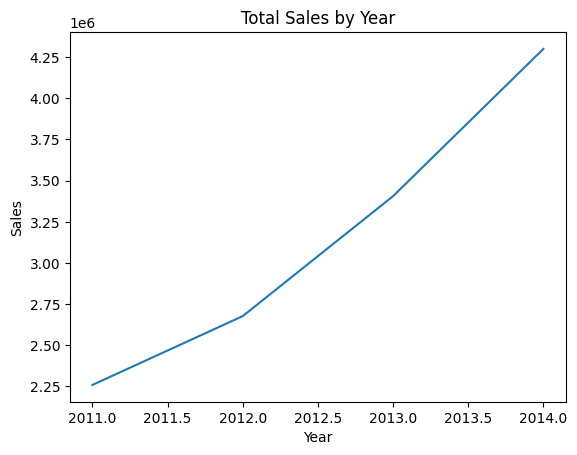

In [141]:
sales_by_year = df.groupby('Year')['Sales'].sum().reset_index()
sns.lineplot(data=sales_by_year, x='Year', y='Sales')
plt.title('Total Sales by Year')
plt.show()

Sales increased steadily from 2.25 in 2011 to 4.25 in 2014, showing a clear positive growth trend without any decline.

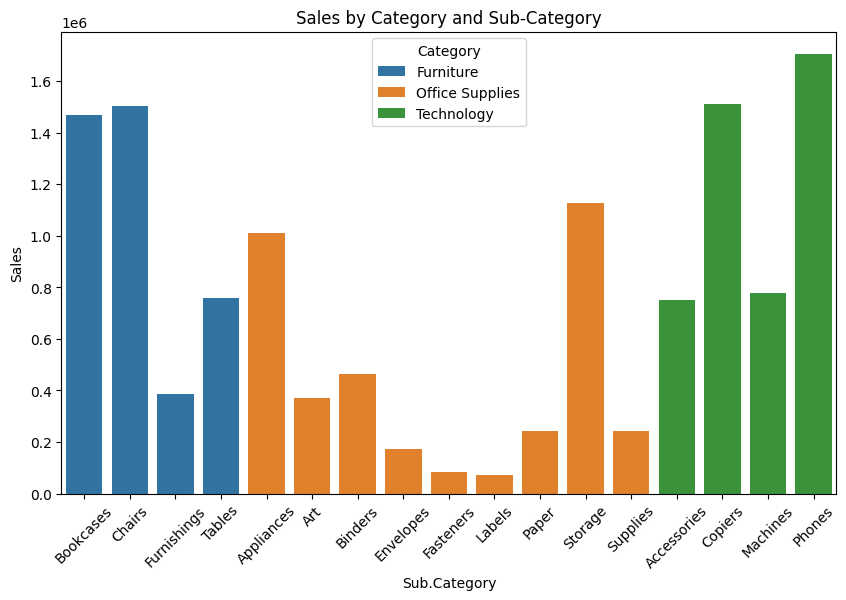

In [142]:
# Sales by Category and Sub-Category
sales_category = df.groupby(['Category','Sub.Category'])['Sales'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=sales_category, x='Sub.Category', y='Sales', hue='Category')
plt.title('Sales by Category and Sub-Category')
plt.xticks(rotation=45)
plt.show()

Technology reached the highest sales, mainly driven by the Phones sub-category (≈1,700,000).
Furniture followed with strong sales in Chairs (≈1,500,000), and Office Supplies ranked third, led by Storage (≈1,200,000).

Overall, technology products clearly play a leading role in the company’s revenue growth.

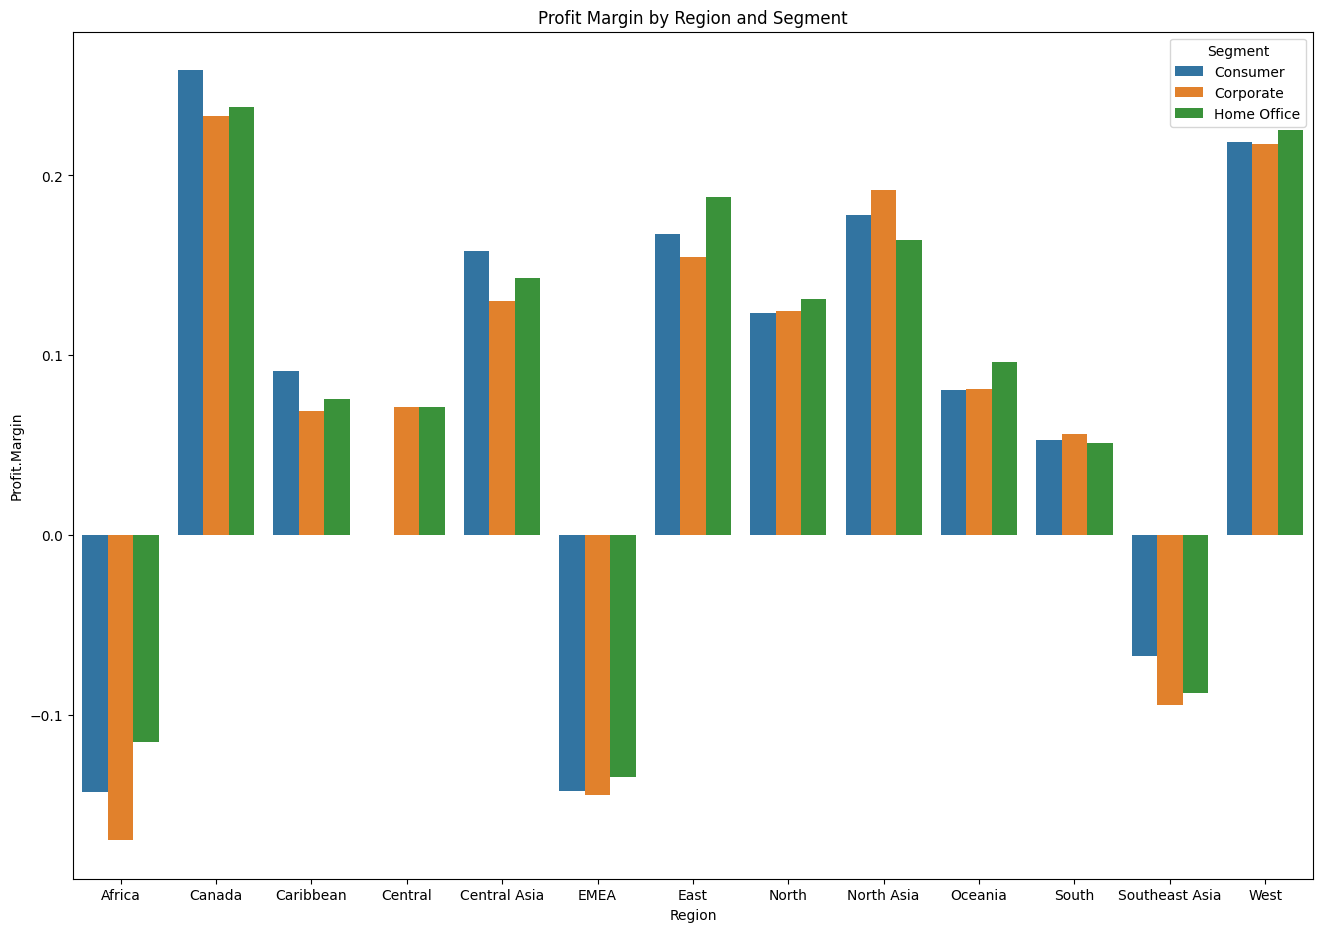

In [143]:
# Profit Margin by Region and Segment
margin_region = df.groupby(['Region','Segment'])['Profit.Margin'].mean().reset_index()
plt.figure(figsize=(16,11))
sns.barplot(data=margin_region, x='Region', y='Profit.Margin', hue='Segment')
plt.title('Profit Margin by Region and Segment')
plt.show()

Canada has the highest profit margin among all regions.  
In contrast, Africa, EMEA, and Southeast Asia show negative margins in every segment, with Africa facing the greatest overall losses.  
This highlights potential issues in pricing, operations, or market performance in those regions.

Customer Analysis

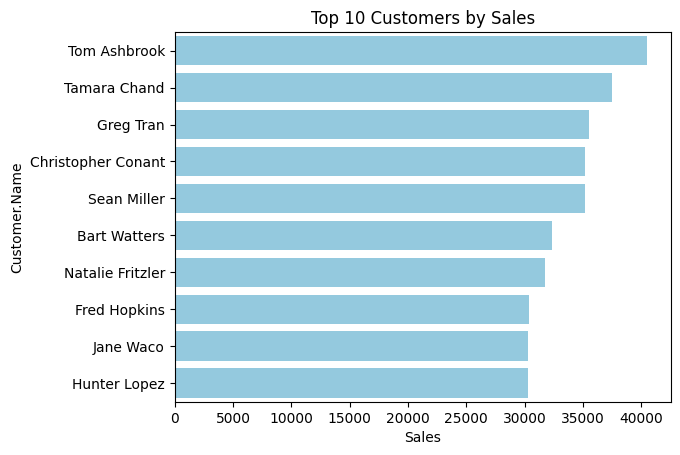

In [144]:
# Top 10 Customers by Sales
top_customers = df.groupby('Customer.Name')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()
sns.barplot(data=top_customers, x='Sales', y='Customer.Name', color='skyblue')
plt.title('Top 10 Customers by Sales')
plt.show()

Tom Ashbrook is the top customer, with purchases of approximately 40,000.  
The top 10 customers each spent over 30,000, indicating that a small portion of clients generates a large share of total revenue.

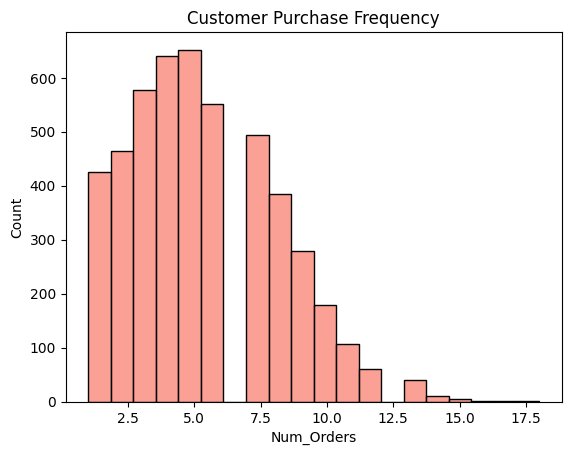

In [145]:
# Customer Purchase Frequency
frequency = df.groupby('Customer.ID')['Order.ID'].nunique().reset_index().rename(columns={'Order.ID':'Num_Orders'})
sns.histplot(frequency['Num_Orders'], bins=20, color='salmon')
plt.title('Customer Purchase Frequency')
plt.show()

Most customers made between 3 and 6 purchases, meaning that occasional buyers are the majority.  
Only a few customers placed more than 10 orders, which suggests limited customer loyalty or repeat buying behavior.

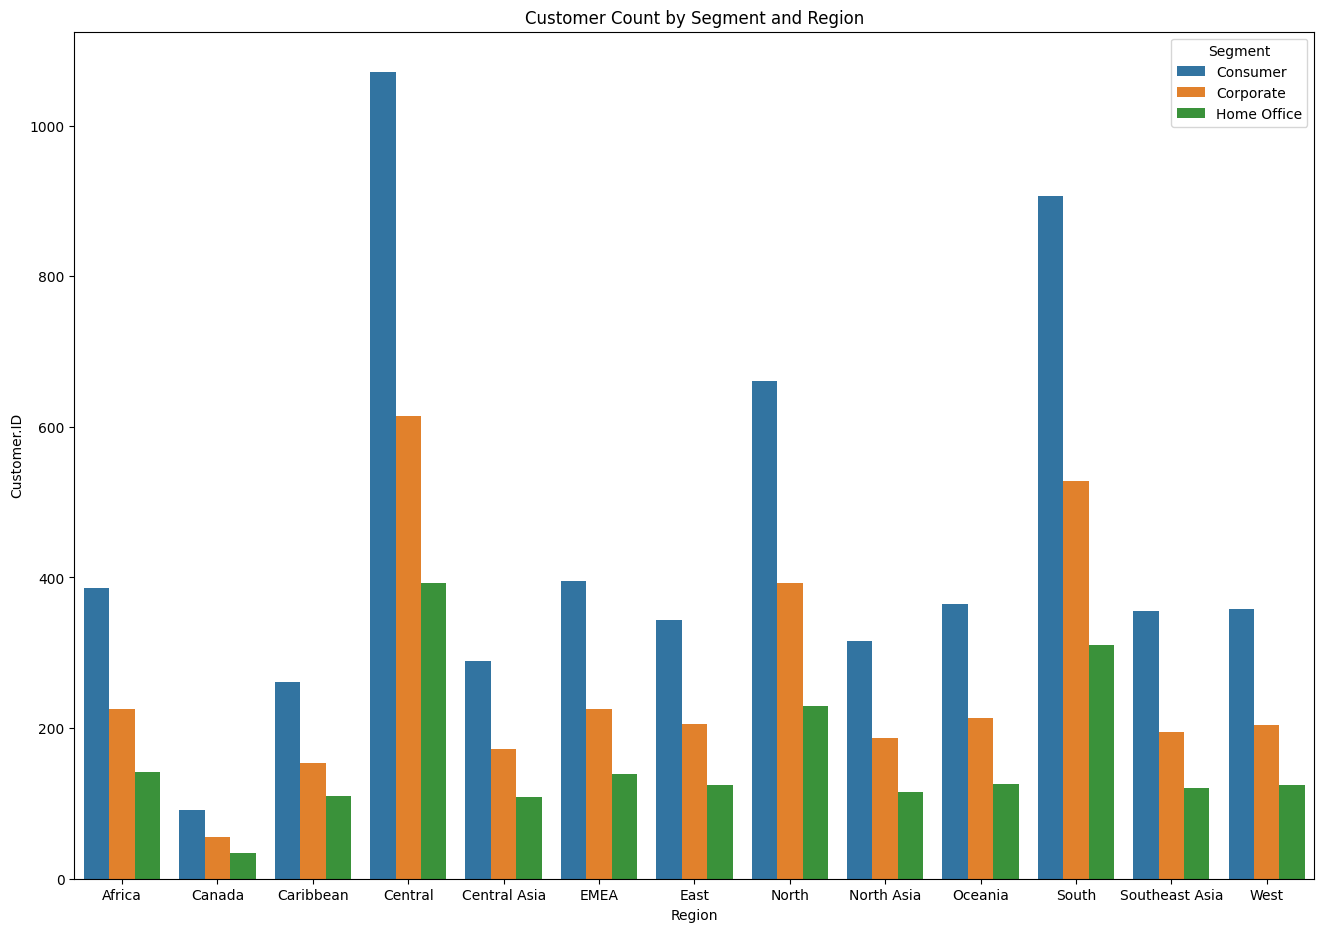

In [146]:
# Customer Segmentation by Segment and Region
segment_region = df.groupby(['Segment','Region'])['Customer.ID'].nunique().reset_index()
plt.figure(figsize=(16,11))
sns.barplot(data=segment_region, x='Region', y='Customer.ID', hue='Segment')
plt.title('Customer Count by Segment and Region')
plt.show()

The Central and South regions have the largest customer bases, mostly from the Consumer segment.  
Across almost all regions, Consumers dominate compared to Corporate and Home Office clients.  
This suggests that the company’s primary market is individual customers rather than businesses.

Product Analysis

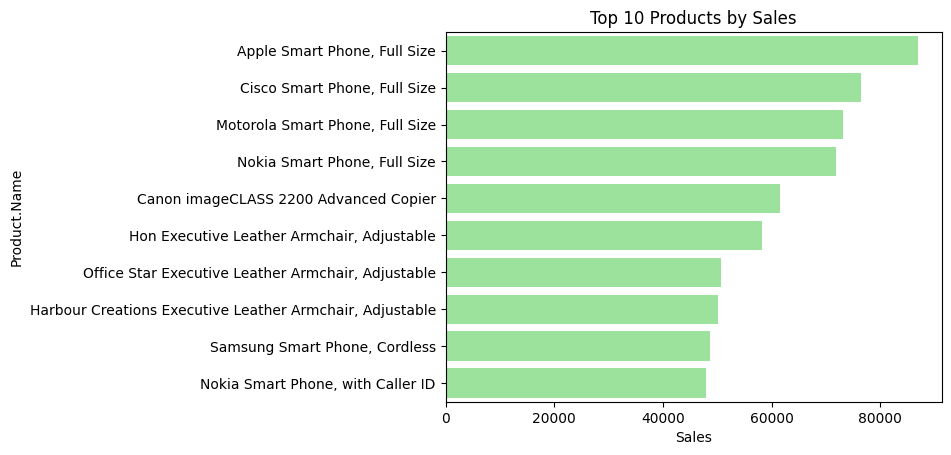

In [147]:
# Top 10 Products by Sales and Profit Margin
top_products = df.groupby('Product.Name')[['Sales','Profit.Margin']].sum().sort_values('Sales', ascending=False).head(10).reset_index()
sns.barplot(data=top_products, x='Sales', y='Product.Name', color='lightgreen')
plt.title('Top 10 Products by Sales')
plt.show()

The *Apple Smart Phone, Full Size* leads the sales ranking with more than 80,000 in total revenue.  
All top 10 products record sales above approximately 48,000, showing that high-priced technology items play a key role in driving overall performance.

In [148]:
# Low-Performing Products
low_products = df[df['Sales'] < df['Sales'].quantile(0.25)]
print("Low-performing products sample:")
print(low_products[['Product.Name','Sales','Profit.Margin']].head())

Low-performing products sample:
                                        Product.Name  Sales  Profit.Margin
0                                          Xerox 225     19       0.491116
1          Wirebound Service Call Books, 5 1/2" x 4"     19       0.489095
2  Adams Phone Message Book, Professional, 400 Me...     21       0.468657
4                                          Xerox 223      6       0.518400
5    Spiral Phone Message Books with Labels by Adams     13       0.506585


Products like *Xerox 225* and *Wirebound Service Call Books* belong to the bottom 25% in sales performance.
Although their sales are low (below 25), they show moderate profit margins around 0.48–0.52, indicating that marketing or pricing adjustments could help improve their contribution.

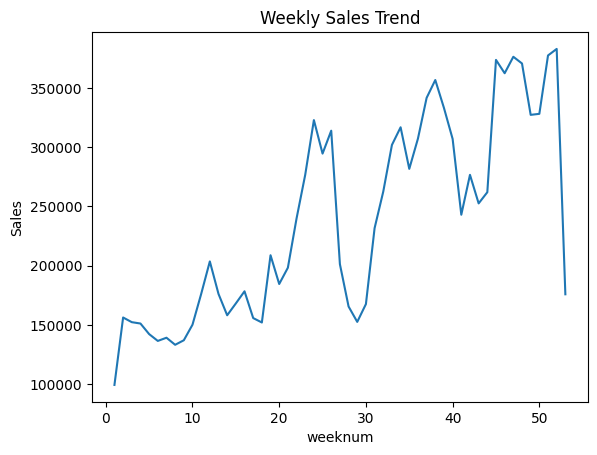

In [149]:
# Weekly Sales Trends
weekly_sales = df.groupby('weeknum')['Sales'].sum().reset_index()
sns.lineplot(data=weekly_sales, x='weeknum', y='Sales')
plt.title('Weekly Sales Trend')
plt.show()

Weekly sales exhibit a consistent upward trend, with noticeable peaks between weeks **40 and 52**.  
This pattern indicates increased business activity toward the end of the year, likely due to holiday sales or promotional campaigns.

Regional Analysis

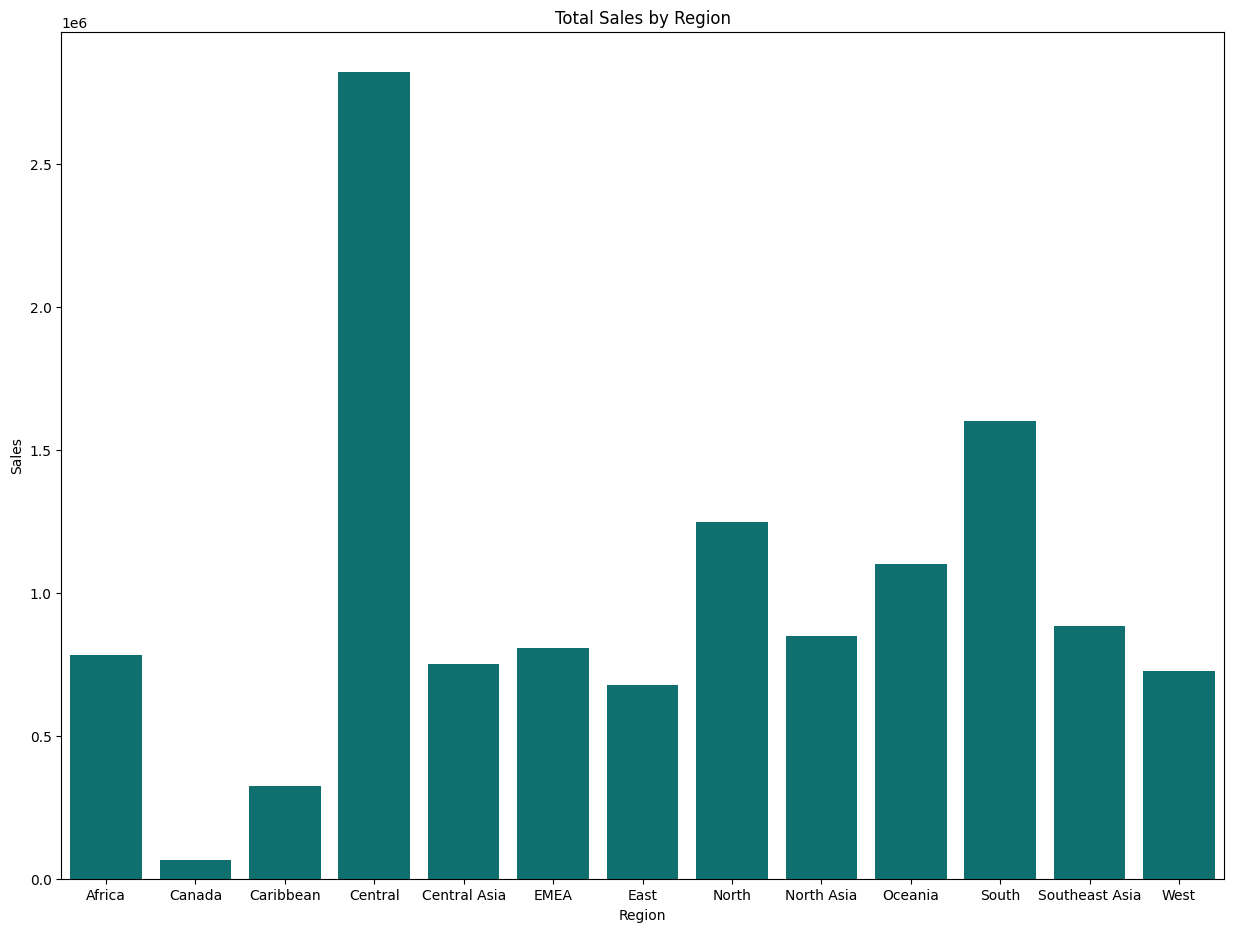

In [150]:
# Sales by Region
region_sales = df.groupby('Region')['Sales'].sum().reset_index()
plt.figure(figsize=(15,11))
sns.barplot(data=region_sales, x='Region', y='Sales', color='teal')
plt.title('Total Sales by Region')
plt.show()

The **Central** region shows the highest total sales (≈2.8M), while **Canada** has the lowest (≈0.1M).  
This indicates a clear imbalance in sales performance across regions.

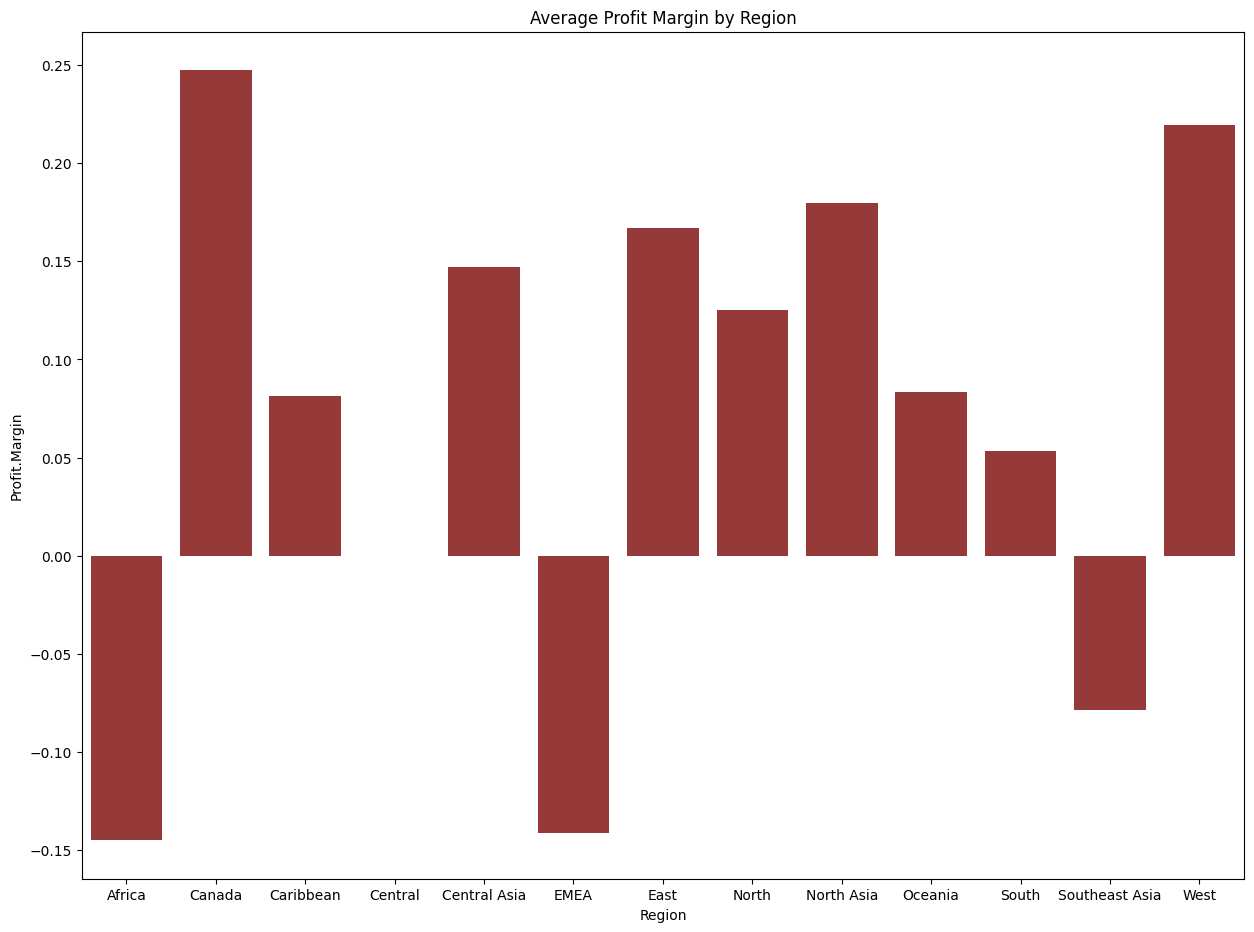

In [151]:
# Average Profit Margin by Region
margin_region_avg = df.groupby('Region')['Profit.Margin'].mean().reset_index()
plt.figure(figsize=(15,11))
sns.barplot(data=margin_region_avg, x='Region', y='Profit.Margin', color='brown')
plt.title('Average Profit Margin by Region')
plt.show()

Canada has the highest average profit margin among all regions.  
In contrast, Africa, EMEA, and Southeast Asia show negative profit margins, with Africa facing the largest overall losses.  
This may indicate inefficiencies in pricing, logistics, or regional market performance.

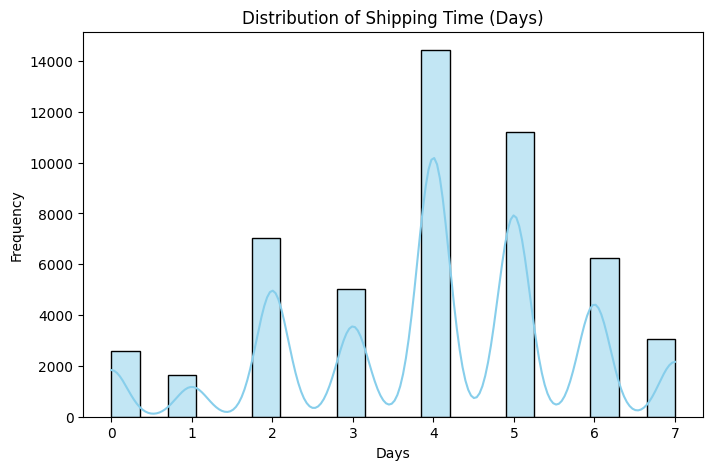

In [152]:
# Check the distribution of Shipping Time
plt.figure(figsize=(8,5))
sns.histplot(df['Delivery.Time'], bins=20, color='skyblue', kde=True)
plt.title('Distribution of Shipping Time (Days)')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

### ⏱️ Shipping Time Distribution — Interpretation

The majority of orders are shipped within a 4 days or less, but there are some with longer delivery times.  
Outliers in shipping time may indicate potential delays or logistical inefficiencies worth investigating.

C:\Users\everi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\everi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 24405 (\N{CJK UNIFIED IDEOGRAPH-5F55}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\everi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\everi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: 

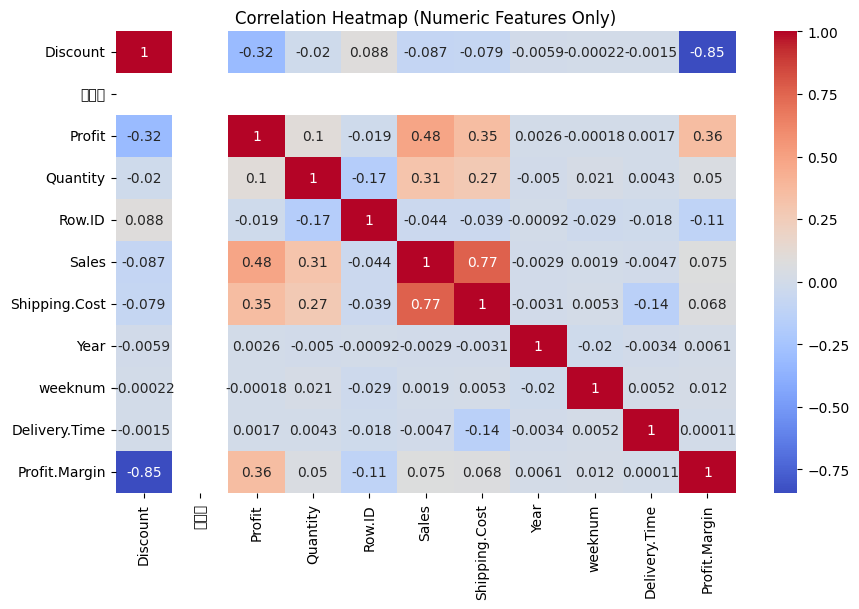

In [153]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()

The correlation matrix reveals a **strong negative correlation** between **Discount and Profit Margin** (-0.85), indicating that higher discounts significantly reduce profit margins.

Additionally, **Sales and Shipping Cost** (0.77) show a **strong positive correlation**, which suggests that higher sales volumes are associated with increased shipping expenses.

These relationships highlight the importance of optimizing discount strategies and shipping efficiency to maintain profitability.

In [154]:
df_clean = df.drop(columns=['记录数', 'Row.ID'], errors='ignore')

In [155]:
df_clean.to_csv('superstore_clean.csv', index=False)

print("Dataset limpio guardado como 'superstore_clean.csv'")

Dataset limpio guardado como 'superstore_clean.csv'


## Final Report — Business Insights

**Objective:**  
This analysis explores Superstore sales, customers, and products to identify revenue growth opportunities and improve inventory management.

---

### 1. Which products and categories generate the most revenue?

The **Technology** category leads in total sales, mainly driven by **Phones**, which reached over **1.7 million** in sales.  
**Furniture** follows, especially with **Chairs** (1.5M), and **Office Supplies** comes third, led by **Storage** (1.2M).  
This shows that **technology products are the main revenue drivers**, and the company could benefit from reinforcing this segment through promotions and inventory availability.

---

### 2. Who are the most valuable customers?

The top customer, **Tom Ashbrook**, generated sales above **40,000**, while the other top 10 customers each contributed more than **30,000**.  
The purchase frequency analysis revealed that **most customers buy only once or twice**, suggesting a need to **improve loyalty and retention programs** to encourage repeat purchases.

---

### 3. Where should marketing strategies focus regionally?

The **Central** region has the **highest sales volume** (around **2.8M**), but **Canada** stands out with the **highest profit margin**.  
In contrast, **Africa**, **EMEA**, and **Southeast Asia** show **negative profit margins**, especially **Africa**, indicating possible issues in **pricing**, **logistics**, or **local demand**.  
Marketing efforts should focus on **profitable regions like Canada** and explore **cost optimization** in underperforming ones.

---

### 4. What sales trends can help with stock and promotions planning?

Sales have shown a **steady growth from 2011 to 2014**, nearly **doubling overall revenue**, with no signs of decline.  
Weekly sales trends indicate some fluctuations but maintain a clear **upward trajectory**, useful for **inventory and promotion scheduling**.  
Additionally, a strong **negative correlation (-0.85)** between **Discount and Profit Margin** confirms that **excessive discounts hurt profitability**, while the **positive correlation (0.77)** between **Sales and Shipping Cost** suggests that **higher volumes increase logistics expenses**, reinforcing the importance of operational efficiency.

---

### Conclusion

Overall, Superstore’s growth is driven by the **Technology category** and **key high-spending customers**, especially in **profitable regions** like Canada.  
However, **losses in some markets** and the **impact of discounts on margins** highlight areas for improvement.  
By optimizing **discounts**, **logistics**, and **customer retention strategies**, the company can **sustain growth and increase profitability** across all regions.
